In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

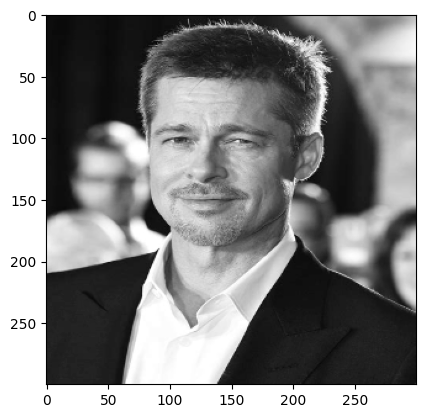

In [16]:
path_to_img = r'D:\College\pccoe\5th sem\CV\Practicals\Final_practicals\Face_recognition\Celebrity_Faces_Dataset\Brad Pitt\002_cc1b9701.jpg'

img = cv2.imread(path_to_img, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (300, 300), cv2.INTER_LINEAR)

plt.gray()
plt.imshow(img)

In [17]:
img = np.hstack([img, np.zeros((300, 1))])
img = np.hstack([np.zeros((300, 1)), img])
img = np.vstack([np.zeros((1 , 302)), img])
img = np.vstack([img , np.zeros((1 , 302))])


In [18]:
img

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  14.,  14., ..., 196., 201.,   0.],
       [  0.,  14.,  14., ..., 194., 198.,   0.],
       ...,
       [  0.,  40.,  32., ...,  18.,  21.,   0.],
       [  0.,  56.,  36., ...,  21.,  49.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

##### Sobel

In [19]:
sobel_x = np.array([
    [1 , 0 , -1],
    [2 , 0 , -2],
    [1 , 0 , -1],
])

sobel_y = sobel_x.T

In [20]:
def same_convolution(img, img_dim, kernel = sobel_x,kernel_size = 3):
    filtered = copy.deepcopy(img)

    for i in range(img_dim):
        for j in range(img_dim):
            filtered[i , j] = np.sum(np.multiply(kernel, filtered[i : i + kernel_size, j : j + kernel_size]))

            if j + kernel_size >= img_dim:
                break
    
        if i + kernel_size >= img_dim:
                break
    return filtered

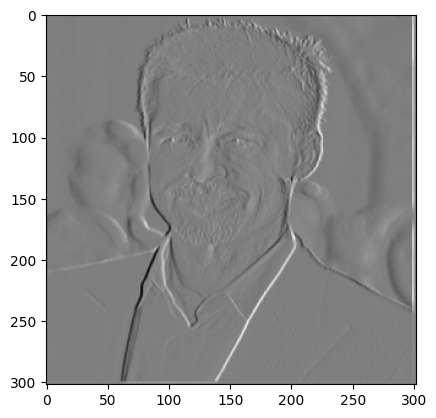

In [21]:
filtered_x = same_convolution(img , img.shape[0], sobel_x)
plt.gray()
plt.imshow(filtered_x)

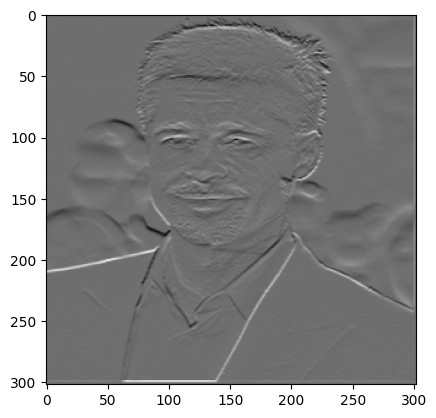

In [22]:
filtered_y = same_convolution(img, img.shape[0], sobel_y)
plt.gray()
plt.imshow(filtered_y)

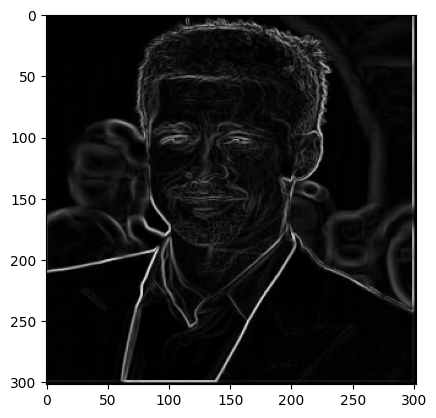

In [23]:
# theta = np.atan2()
g = np.sqrt(filtered_x ** 2 + filtered_y ** 2 )
plt.gray()
plt.imshow(g)

### Median

In [24]:
def median_filter(img, img_dim, kernel_size = 3):
    filtered = copy.deepcopy(img)

    for i in range(img_dim - 1):
        for j in range(img_dim - 1):
            filtered[i , j] = np.median(filtered[i : i + kernel_size, j : j + kernel_size])

            if j + kernel_size >= img_dim:
                break
        
        if i + kernel_size >= img_dim:
                break
    
    return filtered


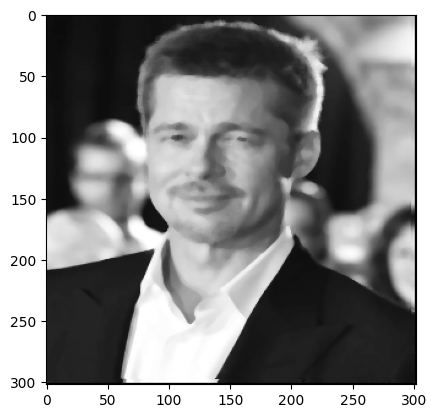

In [25]:
median = median_filter(img , img.shape[0], kernel_size=5)
plt.gray()
plt.imshow(median)

#### Gaussian

In [26]:
std_dev = 10
pi = np.pi
denom = 2 * pi * std_dev ** 2
exp_denom = 2 * std_dev ** 2

gaussian_from_stratch = np.fromfunction( 
    lambda x , y : 
        (1/denom) * np.exp(-(x**2 + y **2) / exp_denom)                                 
, (3 , 3))

gaussian_from_stratch /= np.sum(gaussian_from_stratch)

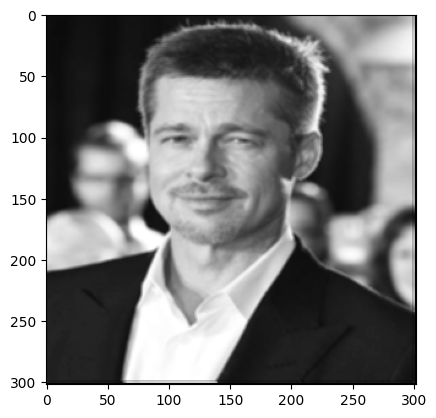

In [27]:
# gaussian = cv2.getGaussianKernel(25 , 5).reshape(5 , 5)
filtered = same_convolution(img , img.shape[0], gaussian_from_stratch, kernel_size=3)
plt.gray()
plt.imshow(filtered)